Step1: for this assignment you can provide your own data. The data must be pulled/scraped from online resources (as covered in other courses) to obtain full credit of this step. For example, you can scrape tweeter data or Kijiji data etc.

In [ ]:
#Extraction data from kijiji
from urllib.request import urlopen
from bs4 import BeautifulSoup 

import datetime
import re

import pandas as pd

In [ ]:
url = 'https://www.kijiji.ca/b-cars-vehicles/city-of-toronto/c27l1700273'
def get_page_num(url):
    
    html = urlopen(url)
    bs = BeautifulSoup(html, 'html.parser')
    try:
        page_info = bs.find('div',class_='showing').text
        page_num = page_info.split()[-2].replace(',','')
        page_num = int(int(page_num)/20)
    except:
        page_num = 1
        pass
    
    return page_num

In [ ]:
def get_item_info(url):
    item_info_list = []
   
        
    html = urlopen(url)
    bs_item = BeautifulSoup(html, 'html.parser')
    
    try: 
        item_brand = bs_item.find(itemprop='brand').text
    except:
        item_brand ='na'
    
    
    try:
        item_model = bs_item.find(itemprop='model').text
    except:
        item_model ='na'
    
    try:
        item_date = bs_item.find(itemprop='vehicleModelDate').text
    except:
        item_date ='na'
    
    try:
        item_price = bs_item.find('span',itemprop='price').text
    except:
        item_price = 'na'
    
    try:
        item_color = bs_item.find(itemprop='color').text
    except:
        item_color = 'na'
        
    try:
        item_config = bs_item.find(itemprop='vehicleConfiguration').text
    except:
        item_config = 'na'
    
    try:
        item_condition = bs_item.find(itemprop='itemCondition').text
    except:
        item_condition = 'na'
    
    try:
        item_bodytype = bs_item.find(itemprop='bodyType').text
    except:
        item_bodytype = 'na'
        
    try:
        item_wheelConfig = bs_item.find(itemprop='driveWheelConfiguration').text
    except:
        item_wheelConfig = 'na'
        
    try:
        item_transmission = bs_item.find(itemprop='vehicleTransmission').text
    except:
        item_transmission = 'na'
        
    try:
        item_fueltype = bs_item.find(itemprop='fuelType').text
    except:
        item_fueltype = 'na'
        
    try:
        item_mileage = bs_item.find(itemprop='mileageFromOdometer').text
    except:
        item_mileage = 'na'
    
       
    item_carfax = bs_item.find('a', href=re.compile('^(https://reports.carproof.com)((?!:).)*$'))
    try:
        item_carfax_link = item_carfax.attrs['href']
    except:
        item_carfax = bs_item.find('a', href=re.compile('^(https://www.carproof.com)((?!:).)*$'))
        try: 
            item_carfax_link = item_carfax.attrs['href']
        except:
            item_carfax_link = 'na'
    
        
    try:
        item_dealer_add = bs_item.find(itemprop='address').text
    except:
        item_dealer_add = 'na'
    
   
        

    
    item_info_list.append(item_brand)
    item_info_list.append(item_model)
    item_info_list.append(item_date)
    item_info_list.append(item_price)
    item_info_list.append(item_color)
    item_info_list.append(item_config)
    item_info_list.append(item_condition)
    item_info_list.append(item_bodytype)
    item_info_list.append(item_wheelConfig)
    item_info_list.append(item_transmission)
    item_info_list.append(item_fueltype)
    item_info_list.append(item_mileage)
    item_info_list.append(item_carfax_link)
    item_info_list.append(item_dealer_add)
   
    
    return item_info_list

In [ ]:
title=[]
price=[]
itemurl=[]

base_url = 'https://www.kijiji.ca'
init_url = 'https://www.kijiji.ca/b-cars-vehicles/city-of-toronto/c27l1700273'

page_num = get_page_num(init_url)

page_num
5008

In [ ]:
all_info_list = []
itemlist = []
for page in range(1,500):
    page_url = 'https://www.kijiji.ca/b-cars-trucks/city-of-toronto/car/k0c174l1700273?rb=true'
    html = urlopen(page_url)
    bs = BeautifulSoup(html, 'html.parser')
    for link in bs.find_all('a', href=re.compile('^(/v-cars-trucks/)((?!:).)*$')):
        if 'href' in link.attrs:
            item_url = base_url + link.attrs['href']
            if '?' not in item_url:
                print(item_url)
                itemlist = get_item_info(item_url)
                print(itemlist)
                all_info_list.append(itemlist)
                itemlist = []

In [ ]:
all_info_list

In [ ]:
df = pd.DataFrame(all_info_list)

In [ ]:
columns_name = ['brand','model','model_year','price','color','configration','condition','body_type',\
               'wheel_config','transmission','fuel_type','mileage','carfax_link','dealer_address']

In [ ]:
df.columns = columns_name

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.to_csv('kijiji_car_2.csv')

Step 2: proceed with initial steps of data wrangling and properly name/label/explain the activities in this (and all other) steps. Use the data you provided in step 1 and apply data wrangling steps including but not limited to data cleaning, formatting and structuring, validating etc.

In [27]:
import pandas as pd

In [2]:
car_df = pd.read_csv('kijiji_car_2.csv')


In [3]:
car_df.head()

,Unnamed: 0,brand,model,model_year,price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,0,Jeep,Wrangler,2016,29998,Green,Sahara,Used,"SUV, Crossover",4 x 4,Manual,Other,"53,428",na,"321 Front St E, Toronto, ON, M5A 1G3"
1,1,Volvo,XC90,2019,39999,Blue,Momentum | 7 PASSENGER | NEW TIRES,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"74,100",na,"935 Woodlawn Road West, Guelph, ON, N1K 1B7"
2,2,Toyota,4Runner,2018,47777,White,SR5 LIMITED 4WD *7-Pass*,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,"36,430",na,"2100 Lawrence Ave, Toronto, ON, M1R 2Z7"
3,3,Chevrolet,Silverado 1500,2014,21888,Black,na,Used,Pickup Truck,4 x 4,Automatic,Other,"208,124",na,"2380 Lawrence Avenue East, Scarborough, ON, M1..."
4,4,Ford,Escape,2020,32987,Black,Titanium +PANROOF+REV CAM+NAV+BLIS,Used,Other,Other,Automatic,Other,"31,329",na,"2062 Weston Road, Toronto, ON, M9N 1X5"


In [4]:
car_df['mileage'] = car_df['mileage'].str.replace(',', '')


In [5]:
car_df.dtypes

Unnamed: 0         int64
brand             object
model             object
model_year        object
price             object
color             object
configration      object
condition         object
body_type         object
wheel_config      object
transmission      object
fuel_type         object
mileage           object
carfax_link       object
dealer_address    object
dtype: object

In [6]:
car_df.head()

,Unnamed: 0,brand,model,model_year,price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,0,Jeep,Wrangler,2016,29998,Green,Sahara,Used,"SUV, Crossover",4 x 4,Manual,Other,53428,na,"321 Front St E, Toronto, ON, M5A 1G3"
1,1,Volvo,XC90,2019,39999,Blue,Momentum | 7 PASSENGER | NEW TIRES,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,74100,na,"935 Woodlawn Road West, Guelph, ON, N1K 1B7"
2,2,Toyota,4Runner,2018,47777,White,SR5 LIMITED 4WD *7-Pass*,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,36430,na,"2100 Lawrence Ave, Toronto, ON, M1R 2Z7"
3,3,Chevrolet,Silverado 1500,2014,21888,Black,na,Used,Pickup Truck,4 x 4,Automatic,Other,208124,na,"2380 Lawrence Avenue East, Scarborough, ON, M1..."
4,4,Ford,Escape,2020,32987,Black,Titanium +PANROOF+REV CAM+NAV+BLIS,Used,Other,Other,Automatic,Other,31329,na,"2062 Weston Road, Toronto, ON, M9N 1X5"


In [7]:
car_df = car_df.drop('Unnamed: 0', axis=1)


In [8]:
#convert to numeric 
car_df['price'] = pd.to_numeric(car_df['price'], errors='coerce')


In [9]:
car_df['mileage'] = pd.to_numeric(car_df['mileage'], errors='coerce')

In [10]:
car_df['model_year'] = pd.to_numeric(car_df['model_year'], errors='coerce')

In [11]:
car_df.head()

,brand,model,model_year,price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,Jeep,Wrangler,2016.0,29998.0,Green,Sahara,Used,"SUV, Crossover",4 x 4,Manual,Other,53428.0,na,"321 Front St E, Toronto, ON, M5A 1G3"
1,Volvo,XC90,2019.0,39999.0,Blue,Momentum | 7 PASSENGER | NEW TIRES,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,74100.0,na,"935 Woodlawn Road West, Guelph, ON, N1K 1B7"
2,Toyota,4Runner,2018.0,47777.0,White,SR5 LIMITED 4WD *7-Pass*,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,36430.0,na,"2100 Lawrence Ave, Toronto, ON, M1R 2Z7"
3,Chevrolet,Silverado 1500,2014.0,21888.0,Black,na,Used,Pickup Truck,4 x 4,Automatic,Other,208124.0,na,"2380 Lawrence Avenue East, Scarborough, ON, M1..."
4,Ford,Escape,2020.0,32987.0,Black,Titanium +PANROOF+REV CAM+NAV+BLIS,Used,Other,Other,Automatic,Other,31329.0,na,"2062 Weston Road, Toronto, ON, M9N 1X5"


In [12]:
#check for null values
car_df.isnull().sum()

brand              0
model              0
model_year        21
price             21
color              0
configration       0
condition          0
body_type          0
wheel_config       0
transmission       0
fuel_type          0
mileage           21
carfax_link        0
dealer_address     0
dtype: int64

In [13]:
#fill null valuse using mean
car_df['price'].fillna(car_df['price'].mean(), inplace=True)


In [14]:
car_df['mileage'].fillna(car_df['mileage'].mean(), inplace=True)


In [15]:
car_df['model_year'].fillna(car_df['model_year'].mean(), inplace=True)


In [16]:
car_df.dtypes

brand              object
model              object
model_year        float64
price             float64
color              object
configration       object
condition          object
body_type          object
wheel_config       object
transmission       object
fuel_type          object
mileage           float64
carfax_link        object
dealer_address     object
dtype: object

In [17]:
#convert into int
car_df['price'] = car_df['price'].astype(int)


In [18]:
car_df['model_year'] = car_df['model_year'].astype(int)


In [23]:
car_df.dtypes

brand              object
model              object
model_year          int32
price               int32
color              object
configration       object
condition          object
body_type          object
wheel_config       object
transmission       object
fuel_type          object
mileage           float64
carfax_link        object
dealer_address     object
dtype: object

In [26]:
car_df.isnull().sum()

brand             0
model             0
model_year        0
price             0
color             0
configration      0
condition         0
body_type         0
wheel_config      0
transmission      0
fuel_type         0
mileage           0
carfax_link       0
dealer_address    0
dtype: int64

In [25]:
car_df.head()

,brand,model,model_year,price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,Jeep,Wrangler,2016,29998,Green,Sahara,Used,"SUV, Crossover",4 x 4,Manual,Other,53428.0,na,"321 Front St E, Toronto, ON, M5A 1G3"
1,Volvo,XC90,2019,39999,Blue,Momentum | 7 PASSENGER | NEW TIRES,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,74100.0,na,"935 Woodlawn Road West, Guelph, ON, N1K 1B7"
2,Toyota,4Runner,2018,47777,White,SR5 LIMITED 4WD *7-Pass*,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,36430.0,na,"2100 Lawrence Ave, Toronto, ON, M1R 2Z7"
3,Chevrolet,Silverado 1500,2014,21888,Black,na,Used,Pickup Truck,4 x 4,Automatic,Other,208124.0,na,"2380 Lawrence Avenue East, Scarborough, ON, M1..."
4,Ford,Escape,2020,32987,Black,Titanium +PANROOF+REV CAM+NAV+BLIS,Used,Other,Other,Automatic,Other,31329.0,na,"2062 Weston Road, Toronto, ON, M9N 1X5"


In [24]:
car_df.isnull().sum()

brand             0
model             0
model_year        0
price             0
color             0
configration      0
condition         0
body_type         0
wheel_config      0
transmission      0
fuel_type         0
mileage           0
carfax_link       0
dealer_address    0
dtype: int64

In [28]:
#check for first row
car_df.iloc[0]

brand                                             Jeep
model                                         Wrangler
model_year                                        2016
price                                            29998
color                                            Green
configration                                    Sahara
condition                                         Used
body_type                               SUV, Crossover
wheel_config                                     4 x 4
transmission                                    Manual
fuel_type                                        Other
mileage                                        53428.0
carfax_link                                         na
dealer_address    321 Front St E, Toronto, ON, M5A 1G3
Name: 0, dtype: object

Step 3: use proper plotting methods to demonstrate the distribution of various attributed (columns) in the data.

In [29]:
import matplotlib.pyplot as plt

In [30]:
# Plot

make_count = car_df.groupby('model_year')['brand'].count()

In [31]:
make_count_frame = make_count.to_frame()

In [32]:
make_count_frame.rename(columns={'brand':'total numbers'},inplace=True)
make_count_frame.head()

,total numbers
model_year,
1991,4
2004,4
2006,1
2008,2
2009,12


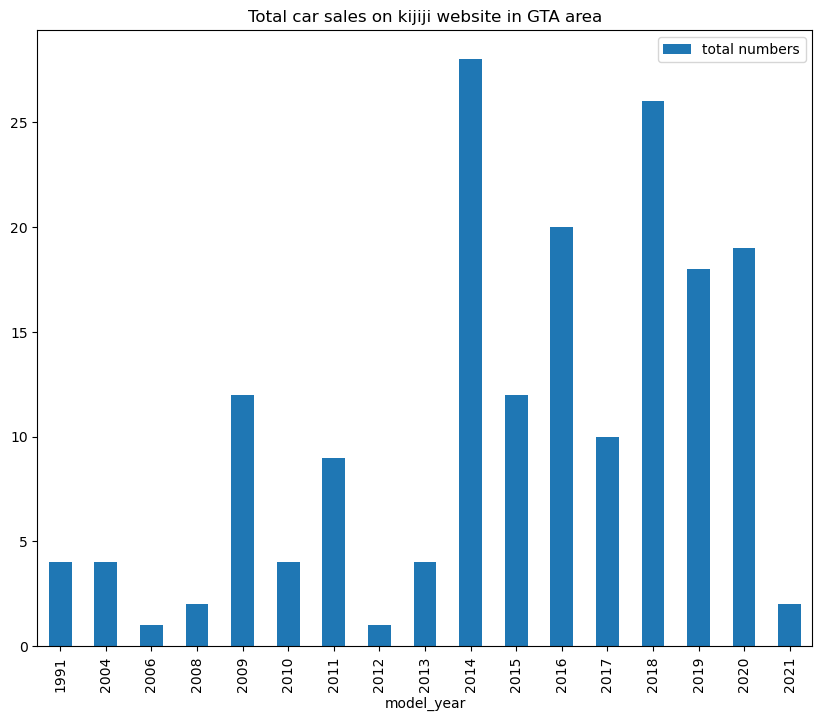

In [33]:
fig = make_count_frame.plot(kind = 'bar',figsize=(10, 8), title = 'Total car sales on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_car_count.png')

In [34]:
#make a group of model year and brand using group by function
brand_count = car_df.groupby('brand')['model_year'].count()

In [35]:
brand_count_df = brand_count.to_frame()

In [36]:
brand_count_df.rename(columns={'model_year':'brand total numbers'},inplace=True)

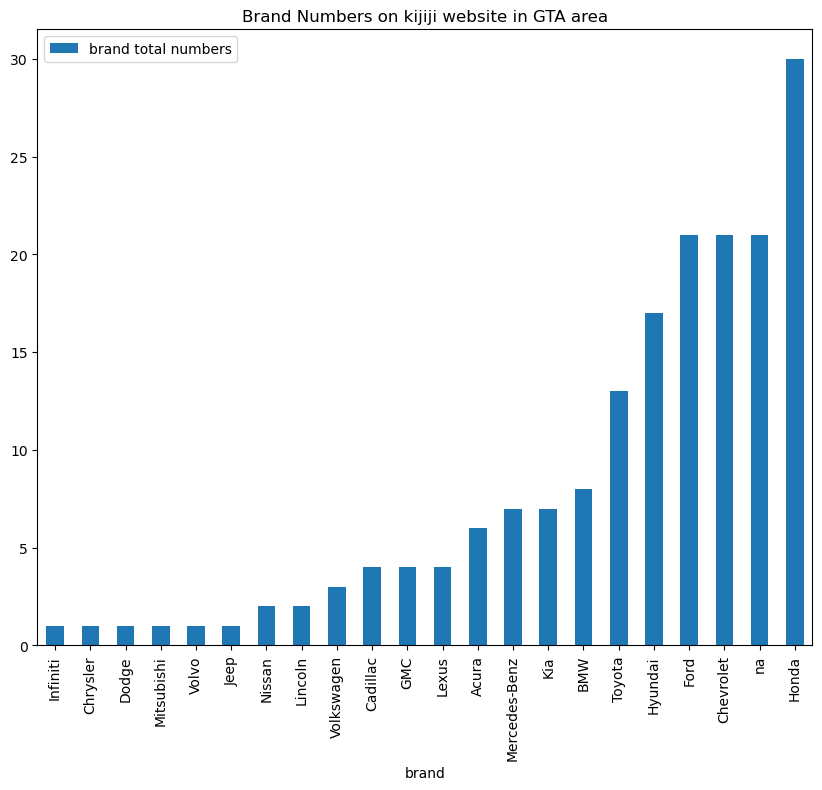

In [37]:
#plot bar graph
brand_count_df = brand_count_df.sort_values(by=['brand total numbers'])
fig = brand_count_df.plot(kind = 'bar',figsize=(10, 8), title = 'Brand Numbers on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_brand_count.png')

In [38]:
brand_mean = car_df.groupby('brand').mean()

C:\Users\sarja\AppData\Local\Temp\ipykernel_17324\3879630962.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_mean = car_df.groupby('brand').mean()


In [39]:
brand_mean.head()

,model_year,price,mileage
brand,,,
Acura,2017.333333,26856.666667,87557.333333
BMW,2017.000000,28790.000000,60532.000000
Cadillac,2013.000000,21000.000000,82328.000000
Chevrolet,2013.952381,27809.476190,114603.666667
Chrysler,2010.000000,6979.000000,158433.000000


In [40]:
brand_mean.rename(columns = {'model_year':'mean_model_year','list_price':'mean_list_price','mileage':'mean_mileage'},inplace = True)
brand_mean.head()

,mean_model_year,price,mean_mileage
brand,,,
Acura,2017.333333,26856.666667,87557.333333
BMW,2017.000000,28790.000000,60532.000000
Cadillac,2013.000000,21000.000000,82328.000000
Chevrolet,2013.952381,27809.476190,114603.666667
Chrysler,2010.000000,6979.000000,158433.000000


In [41]:
brand_mean_df = brand_mean.reset_index()
brand_mean_df.head()

,brand,mean_model_year,price,mean_mileage
0,Acura,2017.333333,26856.666667,87557.333333
1,BMW,2017.000000,28790.000000,60532.000000
2,Cadillac,2013.000000,21000.000000,82328.000000
3,Chevrolet,2013.952381,27809.476190,114603.666667
4,Chrysler,2010.000000,6979.000000,158433.000000


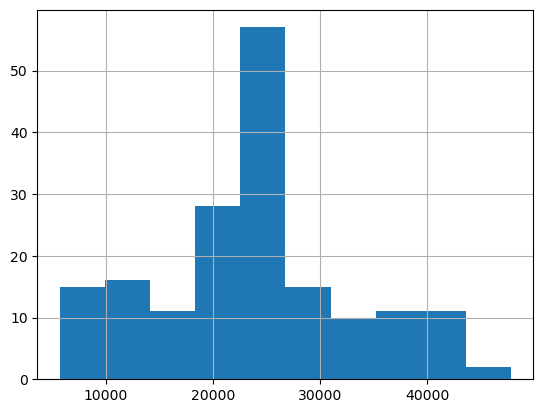

In [44]:
#histogram of price 
car_df['price'].hist()
plt.show()

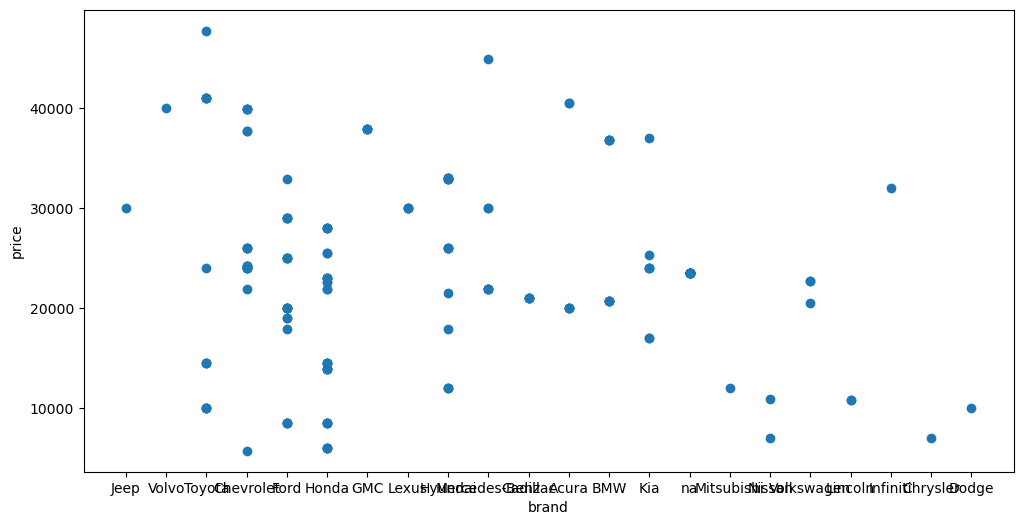

In [46]:
#scatter plot of brand vs price
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(car_df['brand'], car_df['price'])
ax.set_xlabel('brand')
ax.set_ylabel('price')
plt.show()

In [47]:
benz_car = car_df.loc[car_df['brand']=='Mercedes-Benz']

In [49]:
benz_car_plot = benz_car[['model_year','price','mileage']]
benz_car_plot.dropna()

,model_year,price,mileage
11,2015,21888,99984.0
37,2018,29990,75292.0
46,2020,44990,55295.0
56,2015,21888,99984.0
82,2018,29990,75292.0
105,2015,21888,99984.0
151,2015,21888,99984.0


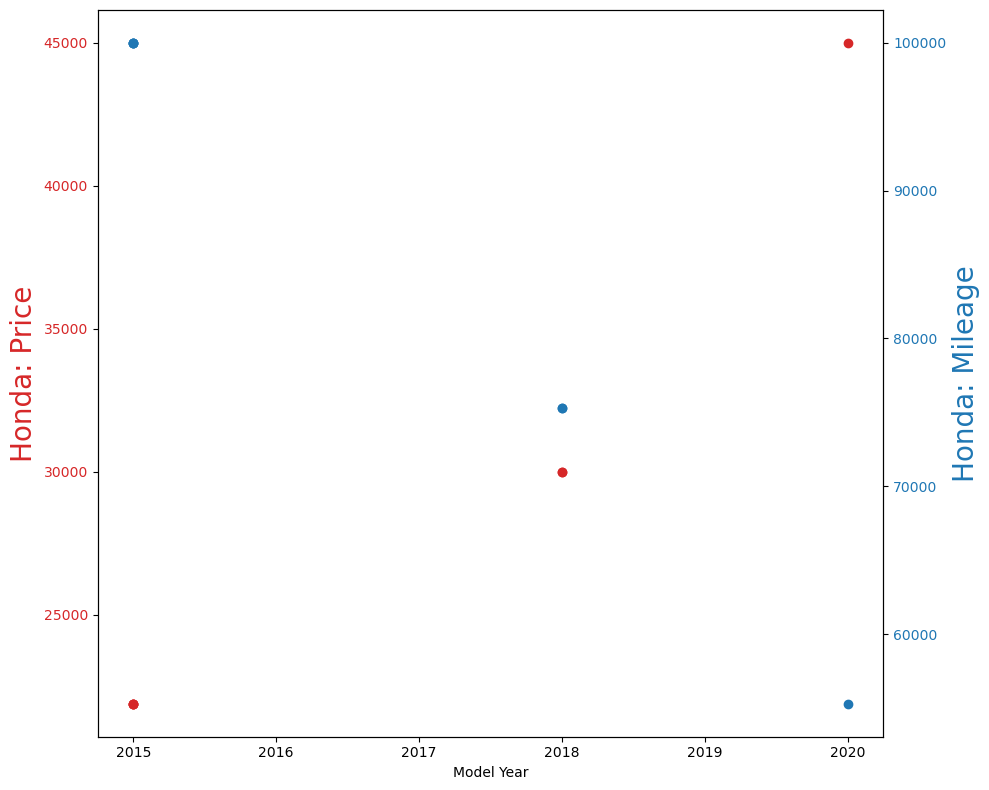

In [50]:
year = benz_car_plot['model_year']
mileage = benz_car_plot['mileage']
price = benz_car_plot['price']
fig, ax1 = plt.subplots( figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Model Year')
ax1.set_ylabel('Honda: Price', color=color, fontsize=20)
ax1.scatter(year, price, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Honda: Mileage', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.scatter(year, mileage, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('kijiji_benz1.png')
plt.show()

In [51]:
car_df.corr()

C:\Users\sarja\AppData\Local\Temp\ipykernel_17324\709410052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_df.corr()


,model_year,price,mileage
model_year,1.000000,0.624126,-0.689848
price,0.624126,1.000000,-0.695926
mileage,-0.689848,-0.695926,1.000000


Step 4: pandas profiling is one of the useful tools you can use for exploratory data analysis (EDA) in future projects at work! Learning pandas profiling is a quite helpful for your future career. Please use the following link and use pandas profiling and generate a report in .html format (submit that along with your codes and pdf report)

In [ ]:
#pip install pandas_profiling --user

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(car_df, title="Pandas Profiling Report")
profile.to_file("report.html")

Step 5: use proper encoding methods and create new numerical columns that represent the categorical column in the original data (and/or vice versa)

In [53]:
pd.get_dummies(car_df['model'], prefix='Model')

,Model_4-Series,Model_4Runner,Model_C-Class,Model_CLA,Model_CR-V,Model_Civic,Model_Colorado,Model_Corolla,Model_Corvette,Model_E-250,...,Model_Soul EV,Model_Sportage,Model_Tucson,Model_Tundra,Model_Volt,Model_Wrangler,Model_X1,Model_XC90,Model_Xterra,Model_na
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Step 6: use proper techniques (boxplots AND IQR) to identify the outliers on each column (attribute) and explain your approach/results.



In [112]:
#IQR
df = car_df[['mileage', 'price']]
df

,mileage,price
0,53428.000000,29998
1,74100.000000,39999
2,36430.000000,47777
3,208124.000000,21888
4,31329.000000,32987
...,...,...
171,115510.632258,23515
172,115510.632258,23515
173,115510.632258,23515
174,115510.632258,23515


In [113]:
df.describe()

,mileage,price
count,176.000000,176.000000
mean,115510.632258,23515.630682
std,63005.561825,9240.093431
min,17981.000000,5750.000000
25%,75292.000000,19737.750000
50%,107384.500000,23515.000000
75%,136125.250000,28990.000000
max,290325.000000,47777.000000


In [114]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1

In [115]:
IQR

mileage    60833.25
price       9252.25
dtype: float64

In [116]:
Q1

mileage    75292.00
price      19737.75
Name: 0.25, dtype: float64

In [118]:
Q3

mileage    136125.25
price       28990.00
Name: 0.75, dtype: float64

In [119]:
df[(df > Q3 + (IQR * 1.5)) | (df < Q1 - (IQR * 1.5))]

,mileage,price
0,NaN,NaN
1,NaN,NaN
2,NaN,47777.0
3,NaN,NaN
4,NaN,NaN
...,...,...
171,NaN,NaN
172,NaN,NaN
173,NaN,NaN
174,NaN,NaN


In [120]:
(df > Q3 + (IQR * 1.5)) | (df < Q1 - (IQR * 1.5))

,mileage,price
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
...,...,...
171,False,False
172,False,False
173,False,False
174,False,False


In [121]:
#grtting the values between Q1 and Q3
df = df[(df >= Q1 - (IQR * 1.5)) & (df <= Q3 + (IQR * 1.5))]
df

,mileage,price
0,53428.000000,29998.0
1,74100.000000,39999.0
2,36430.000000,NaN
3,208124.000000,21888.0
4,31329.000000,32987.0
...,...,...
171,115510.632258,23515.0
172,115510.632258,23515.0
173,115510.632258,23515.0
174,115510.632258,23515.0


<AxesSubplot:>

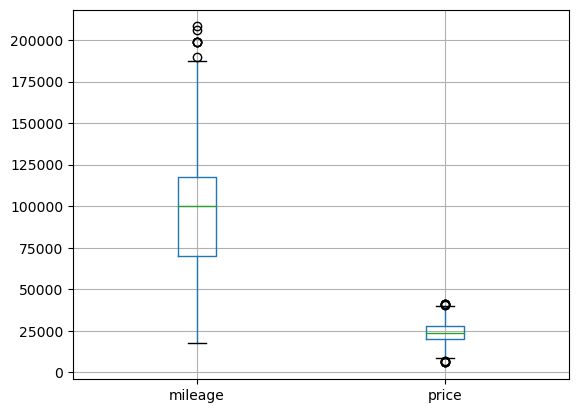

In [122]:
# boxplot
df.boxplot()

Step 7: use all the following techniques to address the outliers and explain/discuss the differences in the outcome of each of the methods  Quantile-based Flooring and Capping  Trimming  Log Transformation

In [55]:
#Quantile-based Flooring and Capping
#for mileage
l, u = car_df['mileage'].quantile(.01),car_df['mileage'].quantile(.99)
l, u

(25284.0, 290325.0)

In [56]:
#for price
l, u = car_df['price'].quantile(.01),car_df['price'].quantile(.99)
l, u

(6000.0, 41996.0)

In [ ]:
#trimming

In [123]:
#for mileage
index = car_df[(car_df['mileage'] >= 17000) | (car_df['mileage'] <= 1400)].index
car_df.drop(index, inplace=True)

In [124]:
#for price
index = car_df[(car_df['price'] >= 17000) | (car_df['price'] <= 1400)].index
car_df.drop(index, inplace=True)

In [57]:
#Log transformation

In [59]:
import numpy as np

In [60]:
#for price
car_df["log_price"] = car_df["price"].map(lambda i: np.log(i) if i > 0 else 0)

In [61]:
car_df["log_price"]

0      10.308886
1      10.596610
2      10.774300
3       9.993694
4      10.403869
         ...    
171    10.065394
172    10.065394
173    10.065394
174    10.065394
175    10.065394
Name: log_price, Length: 176, dtype: float64

In [62]:
#for mileage
car_df["log_mileage"] = car_df["mileage"].map(lambda i: np.log(i) if i > 0 else 0)

In [63]:
car_df["log_mileage"]

0      10.886090
1      11.213171
2      10.503148
3      12.245889
4      10.352299
         ...    
171    11.657118
172    11.657118
173    11.657118
174    11.657118
175    11.657118
Name: log_mileage, Length: 176, dtype: float64

Step 8: Use the unsupervised learning method of your choice (e.g.: K-Means) on the data you have for this assignment and discuss the outcomes.

In [81]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [85]:
#select colomn for model
cols_of_interest = ['model_year',"log_price",
                    "log_mileage"]

In [86]:
data = car_df[cols_of_interest]
data.head(5)

,model_year,log_price,log_mileage
0,2016,10.308886,10.886090
1,2019,10.596610,11.213171
2,2018,10.774300,10.503148
3,2014,9.993694,12.245889
4,2020,10.403869,10.352299


In [87]:
#fitting data into scalar and convert it into array
X = StandardScaler().fit_transform(data)
X

array([[ 2.26944644e-01,  7.22665779e-01, -1.11973882e+00],
       [ 8.00278482e-01,  1.33795117e+00, -5.33331992e-01],
       [ 6.09167203e-01,  1.71793371e+00, -1.80629748e+00],
       [-1.55277914e-01,  4.86402785e-02,  1.31817871e+00],
       [ 9.91389762e-01,  9.25782659e-01, -2.07674626e+00],
       [-7.28611753e-01, -8.32693003e-01,  9.55421039e-01],
       [ 6.09167203e-01,  1.33746995e+00, -2.00799825e-01],
       [ 6.09167203e-01,  1.22775320e+00,  4.17297892e-02],
       [ 2.26944644e-01,  7.22095409e-01, -4.31657217e-02],
       [ 4.18055924e-01,  1.39070445e+00, -1.23726423e+00],
       [ 8.00278482e-01,  4.15970434e-01, -6.96153213e-01],
       [ 3.58333649e-02,  4.86402785e-02,  3.79663556e-03],
       [-3.46389194e-01, -3.99263566e-02, -3.44552399e-01],
       [ 6.09167203e-01,  4.15970434e-01, -1.95461446e-01],
       [ 2.26944644e-01, -9.22326341e-01,  6.82747940e-01],
       [-1.11083431e+00, -1.97406891e+00,  1.23345881e+00],
       [ 8.00278482e-01,  6.49573746e-01

In [ ]:
#Set number of clusters at initialisation time

In [109]:
k_means = KMeans(n_clusters=2)

In [110]:
#Run the clustering algorithm
model = k_means.fit(X)
model

KMeans(n_clusters=2)

In [111]:
#calculate score using euclidian method
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.499899600009325